In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [6]:
loyalty_benefit = pd.read_excel('D:\\python-project\\momo_case\\Loyalty_benefits.xlsx')
loyalty_benefit

,Class ID,Group,%cashback
0,2,cvs,5
1,2,Offline Beverage,5
2,2,data,5
3,3,cvs,7
4,3,Offline Beverage,7
5,3,data,7
6,3,marketplace,2
7,3,supermarket,2
8,4,cvs,12
9,4,Offline Beverage,12


In [7]:
Loyalty_points = pd.read_excel('D:\\python-project\\momo_case\\Loyalty_points.xlsx')
Loyalty_points

,Service Group,Point Mechanism,Maximum Point Per Trans
0,supermarket,1 points/1000VND GMV,500 points
1,data,10 points/1000VND GMV,1000 points
2,cvs,1 points/1000VND GMV,300 points
3,marketplace,1 points/1000VND GMV,500 points
4,Coffee chains and Milk tea,1 points/1000VND GMV,500 points
5,Offline Beverage,1 points/1000VND GMV,300 points


In [8]:
merchant = pd.read_excel('D:\\python-project\\momo_case\\merchants.xlsx')
merchant


,ServiceID,Service Group,Merchant,MerchantID
0,7eleven,cvs,7eleven,1
1,MOMOIOQC20191008,cvs,7eleven,1
2,opcaeon,supermarket,Aeon Mall,2
3,MOMOGPCQ20190613,supermarket,Aeon Mall,2
4,MOMOONXG20191120,supermarket,Aeon Mall,2
...,...,...,...,...
213,buycard_data_vinaphone,data,Vinaphone,43
214,gift_buycard_data_vinaphone,data,Vinaphone,43
215,topup_data_vina,data,Vinaphone,43
216,waynescoffee,Coffee chains and Milk tea,Waynes Coffee,44


In [9]:
loyalty_benefit['Group'].unique()

array(['cvs', 'Offline Beverage', 'data', 'marketplace', 'supermarket'],
      dtype=object)

In [10]:
Loyalty_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Service Group            6 non-null      object
 1   Point Mechanism          6 non-null      object
 2   Maximum Point Per Trans  6 non-null      object
dtypes: object(3)
memory usage: 276.0+ bytes


In [11]:
merchant['Merchant'].unique()

array(['7eleven', 'Aeon Mall', 'Big C', 'Bobapop', 'BSMART',
       'Cà Phê Ông Bầu', 'CHEESE COFFEE', 'Circle K', 'Co.opmart',
       'Coffee House', 'Cộng Cà phê', 'Công ty TNHH Cà Phê Gemini',
       'Đá Đen Coffe', 'E coffee', 'FAMILYMART', 'FINELIFE', 'GongCha',
       'GS25', 'GUTA CAFE', 'Highlands', 'Katinat', 'Koi The', 'Koi Thé',
       'LAZADA', 'Lotte Mart', 'MEGA-PHINDELI CAFE', 'Milano Coffee',
       'Ministop', 'MM Mega Market', 'Mobifone', 'Passio', 'PHUC LONG',
       'SHARTEA', 'THE ALLEY', 'The Coffee House', 'THỨC COFFEE', 'Tiki',
       'TOCOTOCO', 'Toocha', 'Trung Nguyên', 'VIETTEL', 'Viettel',
       'VINAMILK-ONLINE', 'Vinaphone', 'Waynes Coffee'], dtype=object)

In [12]:
merchant['Merchant'] = merchant['Merchant'].replace(to_replace='VIETTEL', value='Viettel')

In [13]:
merchant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ServiceID      218 non-null    object
 1   Service Group  218 non-null    object
 2   Merchant       218 non-null    object
 3   MerchantID     218 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.9+ KB


In [14]:
merchant.nunique()

ServiceID        218
Service Group      6
Merchant          44
MerchantID        44
dtype: int64

In [15]:
transaction = pd.read_csv('D:\\python-project\\momo_case\\transactions.csv')
transaction

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace
1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket
2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket
3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket
4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs
...,...,...,...,...,...,...,...
52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data
52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data
52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data
52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data


In [16]:
transaction.dtypes

DATE                    object
Order_id                 int64
NEWVERTICAL_Merchant    object
MerchantID               int64
User_id                  int64
GMV                      int64
Service Group           object
dtype: object

In [17]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'])
transaction['User_id'] = transaction['User_id'].astype(str)

#DATA PROCESSING

In [18]:
loyalty_points = []
#transaction = transaction.reset_index()
for index, row in transaction.iterrows():
  if row['Service Group'] in ['supermarket','marketplace','Coffee chains and Milk tea']:
    if row['GMV']/1000 < 500:
      loyalty_points.append(row['GMV']/1000)
    else: loyalty_points.append(500)
  if row['Service Group'] in ['data']:
      if row['GMV']/1000 < 1000:
        loyalty_points.append(row['GMV']/100)
      else: loyalty_points.append(1000)
  if row['Service Group'] in ['cvs','Offline Beverage']:
      if row['GMV']/1000 < 300:
        loyalty_points.append(row['GMV']/1000)
      else: loyalty_points.append(300)

In [19]:
transaction['loyalty_points'] = loyalty_points
transaction

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,loyalty_points
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,100.0
1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket,5.0
2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket,106.6
3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket,270.0
4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs,68.0
...,...,...,...,...,...,...,...,...
52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data,300.0
52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data,100.0
52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data,420.0
52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data,50.0


At the end of Mar 2022, How many user achieved rank GOLD?

*The ranking will be reset for each month.

In [20]:
in_march = transaction[(transaction['DATE']>= '2022-03-02') & (transaction['DATE']< '2022-04-01')]
in_march

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,loyalty_points
42637,2022-03-02,21549087636,Supermarket,25,45715492,55000,supermarket,55.0
42638,2022-03-02,21558157954,Supermarket,25,44080459,203600,supermarket,203.6
42639,2022-03-02,21545970988,Supermarket,25,37381541,526400,supermarket,500.0
42640,2022-03-02,21557916934,Supermarket,25,44080459,25000,supermarket,25.0
42641,2022-03-02,21562502367,CVS,28,47025182,36000,cvs,36.0
...,...,...,...,...,...,...,...,...
52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data,300.0
52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data,100.0
52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data,420.0
52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data,50.0


In [21]:
in_march_total_point = in_march.groupby('User_id')['loyalty_points'].sum().reset_index()
in_march_total_point

,User_id,loyalty_points
0,10056218,780.000
1,10156282,100.000
2,10184635,4011.368
3,1018832,2130.000
4,10247812,150.000
...,...,...
1916,964714,1490.000
1917,9658247,44.000
1918,9691514,8.000
1919,981084,2.000


In [22]:
in_march_total_point['ranking'] = in_march_total_point.apply(lambda row: 'STANDARD' if row['loyalty_points'] < 1000
                                                  else 'SILVER' if row['loyalty_points'] < 2000
                                                  else 'GOLD' if row['loyalty_points'] < 5000
                                                  else 'DIAMOND', axis=1)
in_march_total_point['ranking'].value_counts()

STANDARD    1490
SILVER       291
GOLD         126
DIAMOND       14
Name: ranking, dtype: int64

There are 126 users achieved GOLD member

CALCULATE TOTAL CASHBACK COST IN 2022

In [23]:
def calculate_loyalty_point(user, date):
  user_transaction = transaction[transaction['User_id'] == user]
  upper_filter = user_transaction['DATE'] < date
  lower_filter = user_transaction['DATE'] >= (date - timedelta(days=30))
  within_30d_transactions = user_transaction[upper_filter & lower_filter]
  accumulated_loyalty_points = within_30d_transactions['loyalty_points'].sum() 
  return accumulated_loyalty_points                                         


In [24]:
transaction['30 days accumulated loyalty points'] = transaction.apply(lambda row:calculate_loyalty_point(row['User_id'],row['DATE']), axis=1 )     

In [25]:
transaction['Class ID'] = transaction.apply(lambda row: 1 if row['30 days accumulated loyalty points'] < 1000
                                            else 2 if row['30 days accumulated loyalty points'] < 2000
                                            else 3 if row['30 days accumulated loyalty points'] < 5000
                                            else 4, axis = 1)

In [26]:
cashback = transaction.merge(loyalty_benefit, left_on = ['Service Group','Class ID'],right_on = ['Group','Class ID'], how = 'left', suffixes=(True,False))
cashback

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,loyalty_points,30 days accumulated loyalty points,Class ID,Group,%cashback
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,100.0,0.0,1,NaN,NaN
1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket,5.0,0.0,1,NaN,NaN
2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket,106.6,0.0,1,NaN,NaN
3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket,270.0,0.0,1,NaN,NaN
4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs,68.0,0.0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data,300.0,460.0,1,NaN,NaN
52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data,100.0,1116.0,2,data,5.0
52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data,420.0,130.0,1,NaN,NaN
52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data,50.0,130.0,1,NaN,NaN


Replace NaN by value 0

In [27]:
cashback.drop('Group',axis=1, inplace=True)
cashback['%cashback'] = cashback['%cashback'].fillna(0)
cashback['Cashback'] = cashback.apply(lambda row: row['GMV']*row['%cashback']/100 if row['GMV']*row['%cashback']/100 < 1000
                                      else 10000, axis =1)

In [28]:
cashback

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,loyalty_points,30 days accumulated loyalty points,Class ID,%cashback,Cashback
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,100.0,0.0,1,0.0,0.0
1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket,5.0,0.0,1,0.0,0.0
2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket,106.6,0.0,1,0.0,0.0
3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket,270.0,0.0,1,0.0,0.0
4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs,68.0,0.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data,300.0,460.0,1,0.0,0.0
52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data,100.0,1116.0,2,5.0,500.0
52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data,420.0,130.0,1,0.0,0.0
52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data,50.0,130.0,1,0.0,0.0


In [29]:
feb_cashback = cashback[(cashback['DATE'] >= '2022-02-01') & (cashback['DATE'] < '2022-03-01')]
feb_cashback['Cashback'].sum()

6649609.08

Cashback in february is 6.649.609 vnd

WEEKLY RETENTION CHARTS

In [30]:
def  weekly_retention(user,date):
    user_transaction = transaction[transaction['User_id']==user]
    upper_filter = user_transaction['DATE'] < date
    lower_filter = user_transaction['DATE'] >= (date - timedelta(days=8))
    within_7d_transaction = user_transaction[upper_filter & lower_filter]
    if len(within_7d_transaction) < 1:
        return 0
    else:
        return 1

In [31]:
transaction['7 days retention'] = transaction.apply(lambda row: weekly_retention(row['User_id'],row['DATE']), axis = 1)

In [32]:
transaction

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,loyalty_points,30 days accumulated loyalty points,Class ID,7 days retention
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,100.0,0.0,1,0
1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket,5.0,0.0,1,0
2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket,106.6,0.0,1,0
3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket,270.0,0.0,1,0
4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs,68.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data,300.0,460.0,1,0
52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data,100.0,1116.0,2,1
52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data,420.0,130.0,1,1
52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data,50.0,130.0,1,1


In [33]:
retention = transaction.groupby('DATE')['7 days retention'].sum().reset_index()
retention

,DATE,7 days retention
0,2021-01-01,0
1,2021-01-02,1
2,2021-01-03,4
3,2021-01-04,5
4,2021-01-05,4
...,...,...
449,2022-03-27,271
450,2022-03-28,217
451,2022-03-29,317
452,2022-03-30,197


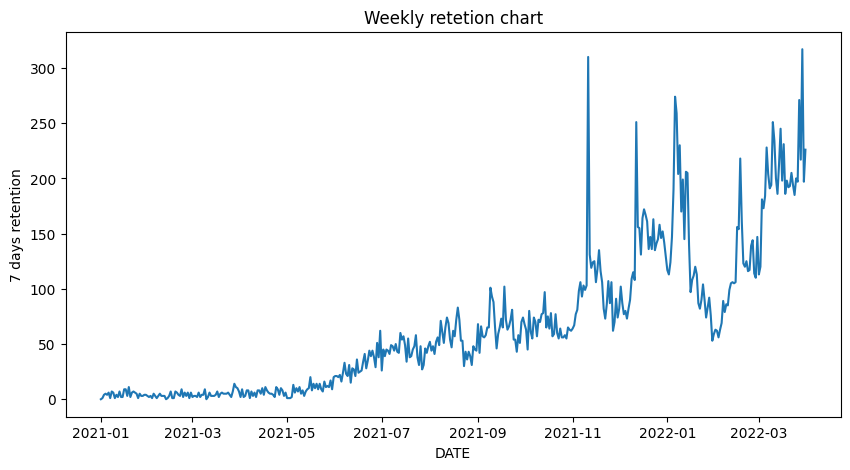

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=retention['DATE'],y=retention['7 days retention'])
plt.title('Weekly retetion chart')
plt.show()

Part 2. Analyze and comment

In [35]:
daily_transaction = transaction.groupby('DATE')['Order_id'].count().reset_index()
daily_transaction

,DATE,Order_id
0,2021-01-01,17
1,2021-01-02,20
2,2021-01-03,13
3,2021-01-04,16
4,2021-01-05,15
...,...,...
449,2022-03-27,498
450,2022-03-28,422
451,2022-03-29,493
452,2022-03-30,392


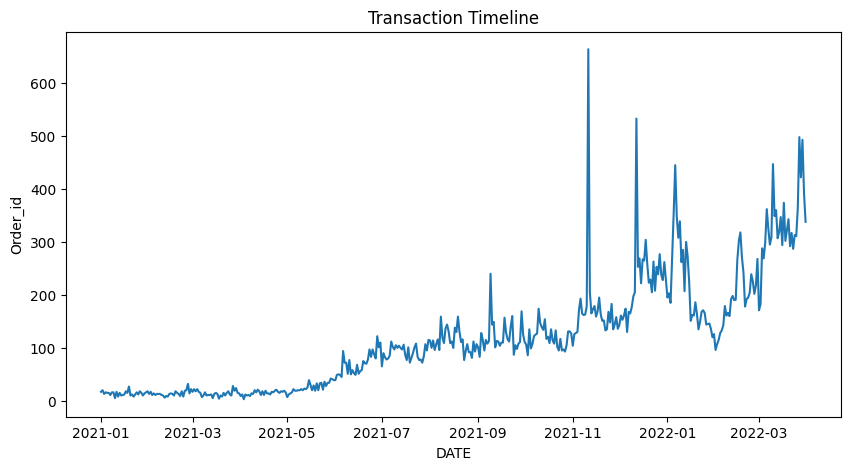

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=daily_transaction['DATE'],y=daily_transaction['Order_id'])
plt.title('Transaction Timeline')
plt.show()

In [37]:
transaction['Day of week'] = transaction['DATE'].dt.day_name()
DOW_order = transaction.groupby('Day of week')['Order_id'].count().reset_index()
DOW_order

,Day of week,Order_id
0,Friday,7101
1,Monday,7181
2,Saturday,7323
3,Sunday,7729
4,Thursday,8728
5,Tuesday,7353
6,Wednesday,7345


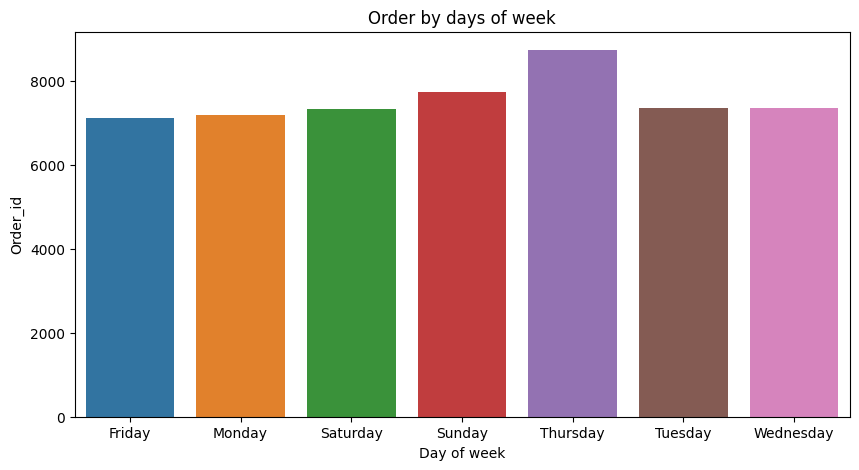

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=DOW_order['Day of week'],y=DOW_order['Order_id'])
plt.title('Order by days of week')
plt.show()

In [39]:
DOW_retention = transaction.groupby('Day of week')['7 days retention'].sum().reset_index()
DOW_retention

,Day of week,7 days retention
0,Friday,4173
1,Monday,4012
2,Saturday,3952
3,Sunday,4134
4,Thursday,4926
5,Tuesday,4190
6,Wednesday,4109


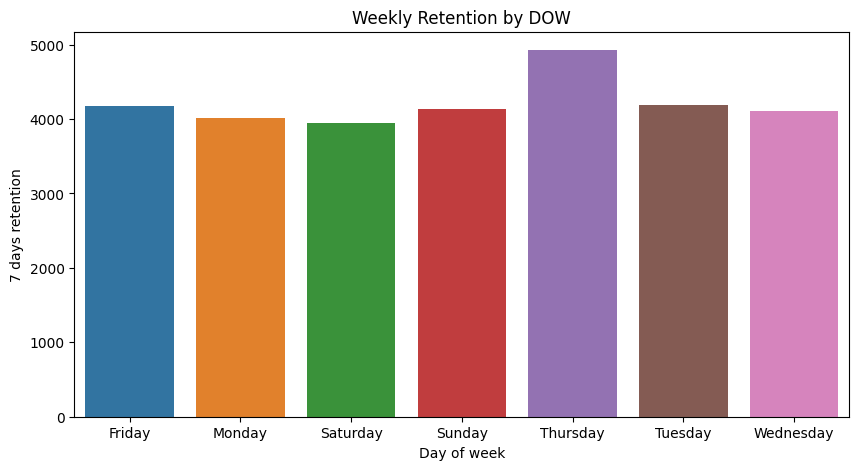

In [40]:
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=DOW_retention['Day of week'],y=DOW_retention['7 days retention'])
plt.title('Weekly Retention by DOW')
plt.show()

From 2 charts above, weekly retention rate and daily transaction have been increasing. From November 2021 to January 2022, the company recorded all-time high in these. The two KPIs are uptrending in January 2022 to the end of March 2022.
To increase user's performance monthly, Marketing department can:
-Create content that speaks to the customers and make it easy to understand. Update the old ones and track the traffic rate.
-Improve UX and UI of the website and mobile app.
-Focus marketing more on Thursday as this day have the highest transactions and weekly retention.
-Provide discount code, voucher for lost customer to bring them back with the company service.

In [41]:
cashback

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,loyalty_points,30 days accumulated loyalty points,Class ID,%cashback,Cashback
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,100.0,0.0,1,0.0,0.0
1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket,5.0,0.0,1,0.0,0.0
2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket,106.6,0.0,1,0.0,0.0
3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket,270.0,0.0,1,0.0,0.0
4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs,68.0,0.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data,300.0,460.0,1,0.0,0.0
52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data,100.0,1116.0,2,5.0,500.0
52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data,420.0,130.0,1,0.0,0.0
52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data,50.0,130.0,1,0.0,0.0


In [42]:
cashback[cashback['%cashback']> 0] ['%cashback'].count()

10537

10537 users are rewarded cashback

In [43]:
cashback['%cashback'].value_counts()

0.0     42223
5.0      5426
7.0      2306
2.0      2155
12.0      650
Name: %cashback, dtype: int64

In [44]:
cashback['%cashback'].describe()

count    52760.000000
mean         1.049697
std          2.355511
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: %cashback, dtype: float64

In [45]:
cashback.groupby('Service Group').agg({'GMV':'sum','Cashback':'sum'}).reset_index().sort_values(by=['GMV'], ascending=False)

,Service Group,GMV,Cashback
4,marketplace,3925019072,25538927.40
2,cvs,1882831446,29136045.94
5,supermarket,1243618881,7192890.84
3,data,353137800,17952270.00
0,Coffee chains and Milk tea,154917495,0.00
1,Offline Beverage,1883000,110900.00


GMV of cvs and data is not high but the number of cashback both of them rewarded are higher

In [46]:
cashback.groupby('Class ID').agg({'GMV':'sum','Cashback':'sum'}).reset_index().sort_values(by=['GMV'], ascending=False)

,Class ID,GMV,Cashback
0,1,4643490295,0.00
1,2,1189550347,22749853.60
2,3,911306886,36338741.90
3,4,817060166,20842438.68


Class ID 3 is third in GMV but highest in cashback, so Class ID 3 is overawarded cashback

In [58]:
scheme = cashback.groupby(['Service Group', 'Class ID']).agg({'GMV':'sum','Cashback':'sum','Order_id':'nunique'}).reset_index()
scheme['Cashback/GMV ratio'] = scheme['Cashback'] / scheme['GMV']

In [59]:
scheme

,Service Group,Class ID,GMV,Cashback,Order_id,Cashback/GMV ratio
0,Coffee chains and Milk tea,1,109651307,0.00,1546,0.000000
1,Coffee chains and Milk tea,2,21289770,0.00,280,0.000000
2,Coffee chains and Milk tea,3,16633645,0.00,207,0.000000
3,Coffee chains and Milk tea,4,7342773,0.00,79,0.000000
4,Offline Beverage,1,1233000,0.00,21,0.000000
5,Offline Beverage,2,650000,110900.00,12,0.170615
6,cvs,1,1048714355,0.00,7198,0.000000
7,cvs,2,354618338,14395013.60,1619,0.040593
8,cvs,3,325661309,10310072.46,1098,0.031659
9,cvs,4,153837444,4430959.88,420,0.028803


Question 3

Which user have 20 consecutive days in DIAMOND in March? Who have the most days?

In [49]:
first = transaction['DATE'] >= '2022-03-01'
last = transaction['DATE'] < '2022-04-01'
march = transaction[first & last]
diamond_in_march = march[march['Class ID'] == 4] 
diamond_in_march


,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,loyalty_points,30 days accumulated loyalty points,Class ID,7 days retention,Day of week
42499,2022-03-01,21511066166,Airtime,43,12229364,20000,data,200.0,7653.900,4,1,Tuesday
42522,2022-03-01,21536667833,Marketplace,24,47662326,180400,marketplace,180.4,22283.326,4,1,Tuesday
42532,2022-03-01,21535694798,Marketplace,24,47662326,188600,marketplace,188.6,22283.326,4,1,Tuesday
42542,2022-03-01,21536878488,Marketplace,24,47662326,433400,marketplace,433.4,22283.326,4,1,Tuesday
42543,2022-03-01,21536879244,Marketplace,24,47662326,1270000,marketplace,500.0,22283.326,4,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
52637,2022-03-31,22540487177,Marketplace,24,44850195,150900,marketplace,150.9,5420.102,4,1,Thursday
52707,2022-03-31,22553554958,Airtime,41,49689927,10000,data,100.0,9300.000,4,1,Thursday
52732,2022-03-31,22545659290,Airtime,41,49689927,10000,data,100.0,9300.000,4,1,Thursday
52742,2022-03-31,22516198917,Airtime,41,49689927,10000,data,100.0,9300.000,4,1,Thursday


In [50]:
march_timeline = pd.date_range(start='2022-03-01',end='2022-03-31')
date_col = []
uid_col = []
for user_id in diamond_in_march['User_id'].unique():
    for date in march_timeline:
        uid_col.append(user_id)
        date_col.append(date)
march_user = pd.DataFrame(
    {'User_id' : uid_col,
     'DATE' : date_col})

The winners who were there during 31 days

In [51]:
march_user['User_id'].value_counts()

12229364    31
47662326    31
57207697    31
39314846    31
55200938    31
51432947    31
50185392    31
36884902    31
43160536    31
49689927    31
45426067    31
39619396    31
55443594    31
54960619    31
44850195    31
Name: User_id, dtype: int64

In [52]:
march_user['loyalty_points'] = march_user.apply(lambda row: calculate_loyalty_point(row['User_id'],row['DATE']),axis=1) 
march_user = march_user.sort_values(by=['User_id','DATE'])

In [53]:
loyalty_points = list(march_user['loyalty_points'])
day_count = []
a = 0
for entry in loyalty_points:
  if len(day_count) % 31 == 0:
    a = 1
    day_count.append(a)
  else:
    if entry >= 5000:
      a = a + 1
      day_count.append(a)
    else:
      a = 1
      day_count.append(a)



In [54]:
march_user['Consecutive day count'] = day_count


In [55]:
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
  print(march_user)

      User_id       DATE  loyalty_points  Consecutive day count
0    12229364 2022-03-01        7653.900                      1
1    12229364 2022-03-02        7353.900                      2
2    12229364 2022-03-03        7353.900                      3
3    12229364 2022-03-04        7353.900                      4
4    12229364 2022-03-05        7545.806                      5
5    12229364 2022-03-06        7545.806                      6
6    12229364 2022-03-07        6382.006                      7
7    12229364 2022-03-08        6382.006                      8
8    12229364 2022-03-09        5943.506                      9
9    12229364 2022-03-10        5443.506                     10
10   12229364 2022-03-11        5443.506                     11
11   12229364 2022-03-12        4291.606                      1
12   12229364 2022-03-13        3198.106                      1
13   12229364 2022-03-14        3084.806                      1
14   12229364 2022-03-15        3424.806

In [56]:
result = march_user.groupby('User_id')['Consecutive day count'].max().reset_index()
result[result['Consecutive day count'] >= 20].sort_values(by = 'Consecutive day count' ,ascending = False)

,User_id,Consecutive day count
2,39314846,31
7,47662326,31
14,57207697,31
10,51432947,28
12,55200938,23
9,50185392,22
1,36884902,21
4,43160536,21


In [61]:
march_user[march_user['User_id'] == '39314846'] 

,User_id,DATE,loyalty_points,Consecutive day count
93,39314846,2022-03-01,5636.52,1
94,39314846,2022-03-02,5636.52,2
95,39314846,2022-03-03,5636.52,3
96,39314846,2022-03-04,6910.72,4
97,39314846,2022-03-05,8462.72,5
98,39314846,2022-03-06,9421.88,6
99,39314846,2022-03-07,8649.18,7
100,39314846,2022-03-08,8754.79,8
101,39314846,2022-03-09,8754.79,9
102,39314846,2022-03-10,8622.79,10
